In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("MentalHealthSurvey.csv")
df.head()

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,3,5,4,4,1,5,5,5,3,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,3,5,5,2,3,5,5,4,4,Online Entertainment


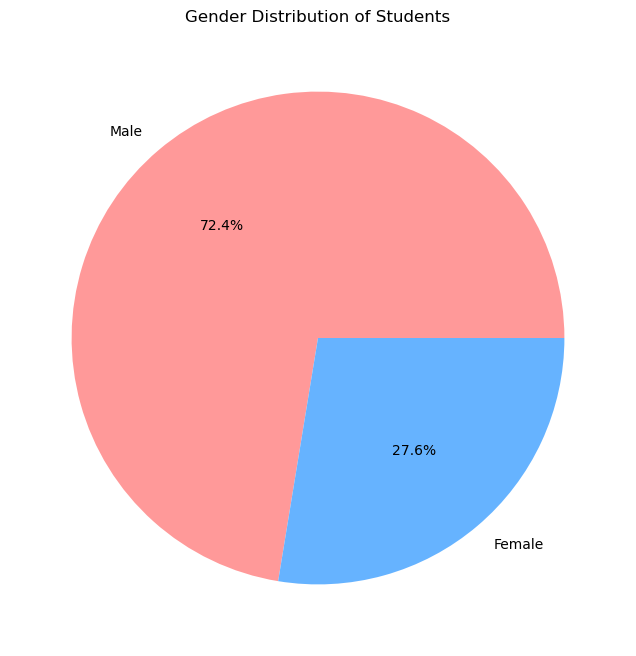

In [3]:
plt.figure(figsize=(8, 8))
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution of Students')
plt.ylabel('')
plt.show()

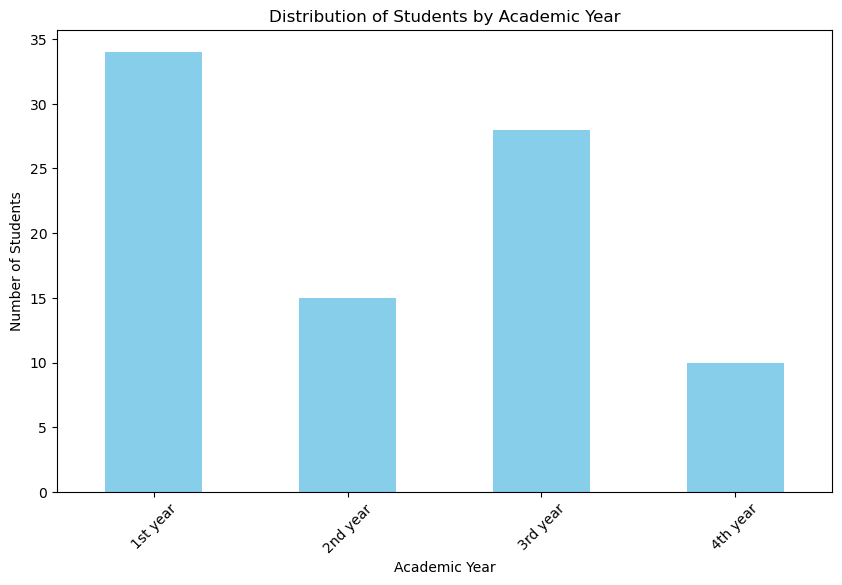

In [4]:
# Bar Chart for Academic Year
plt.figure(figsize=(10, 6))
df['academic_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Students by Academic Year')
plt.xlabel('Academic Year')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.show()

In [5]:
# Extract numeric part from 'academic_year' and convert to float
df['academic_year_num'] = df['academic_year'].str.extract('(\d+)').astype(float)

# Check for conversion issues
print(df[['academic_year', 'academic_year_num']].head())

  academic_year  academic_year_num
0      2nd year                2.0
1      3rd year                3.0
2      3rd year                3.0
3      3rd year                3.0
4      3rd year                3.0


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\pabbi\AppData\Local\Temp\ipykernel_8984\2652904387.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['academic_year_num'] = df['academic_year'].str.extract('(\d+)').astype(float)


In [6]:
def convert_cgpa(cgpa_range):
    try:
        if isinstance(cgpa_range, str):
            if '-' in cgpa_range:
                lower, upper = cgpa_range.split('-')
                return (float(lower) + float(upper)) / 2
            else:
                return float(cgpa_range)  # For cases without a range
        return None
    except:
        return None

df['cgpa_numeric'] = df['cgpa'].apply(convert_cgpa)

print(df[['cgpa', 'cgpa_numeric']].head())


      cgpa  cgpa_numeric
0  3.0-3.5          3.25
1  3.0-3.5          3.25
2  2.5-3.0          2.75
3  2.5-3.0          2.75
4  3.0-3.5          3.25


In [7]:
print(df['cgpa_numeric'].isnull().sum())

0


In [8]:
print(df['academic_year'].unique())


['2nd year' '3rd year' '1st year' '4th year']


In [9]:
df['academic_year_num'] = df['academic_year'].str.extract('(\d+)').astype(float)


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\pabbi\AppData\Local\Temp\ipykernel_8984\3674981060.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['academic_year_num'] = df['academic_year'].str.extract('(\d+)').astype(float)


In [10]:
def extract_year(year_str):
    year_map = {
        '1st year': 1,
        '2nd year': 2,
        '3rd year': 3,
        '4th year': 4
    }
    return year_map.get(year_str, None)

df['academic_year_num'] = df['academic_year'].apply(extract_year)

print(df[['academic_year', 'academic_year_num']].head())


  academic_year  academic_year_num
0      2nd year                  2
1      3rd year                  3
2      3rd year                  3
3      3rd year                  3
4      3rd year                  3


In [11]:
print(df[['academic_year', 'academic_year_num']].head())


  academic_year  academic_year_num
0      2nd year                  2
1      3rd year                  3
2      3rd year                  3
3      3rd year                  3
4      3rd year                  3


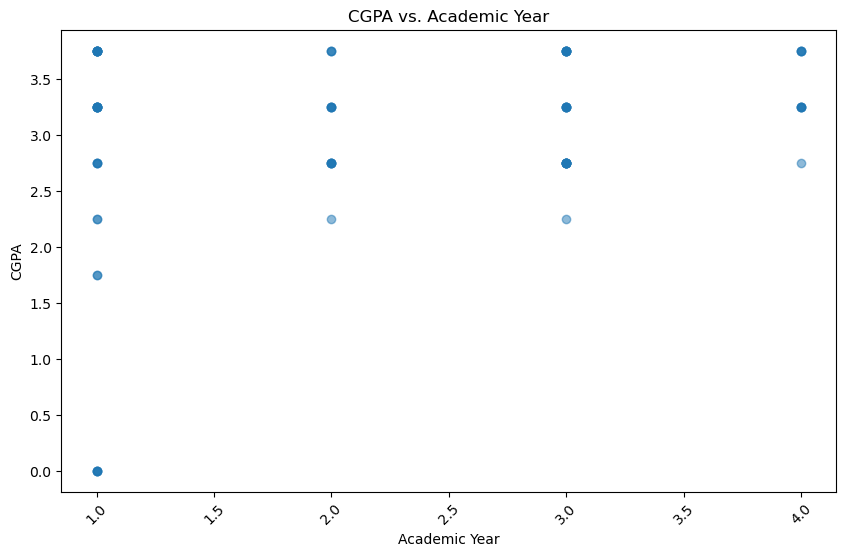

In [12]:
#Scatter Plot: CGPA vs. Academic Year
plt.figure(figsize=(10, 6))
plt.scatter(df['academic_year_num'], df['cgpa_numeric'], alpha=0.5)
plt.title('CGPA vs. Academic Year')
plt.xlabel('Academic Year')
plt.ylabel('CGPA')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

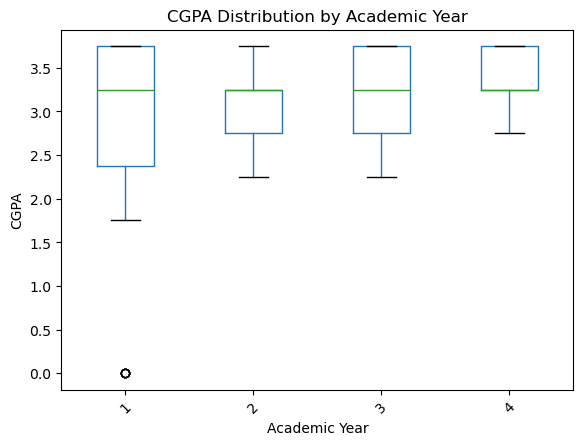

In [13]:
#Box Plot: CGPA Distribution by Academic Year
plt.figure(figsize=(12, 8))
df.boxplot(column='cgpa_numeric', by='academic_year_num', grid=False)
plt.title('CGPA Distribution by Academic Year')
plt.suptitle('')
plt.xlabel('Academic Year')
plt.ylabel('CGPA')
plt.xticks(rotation=45)
plt.show()


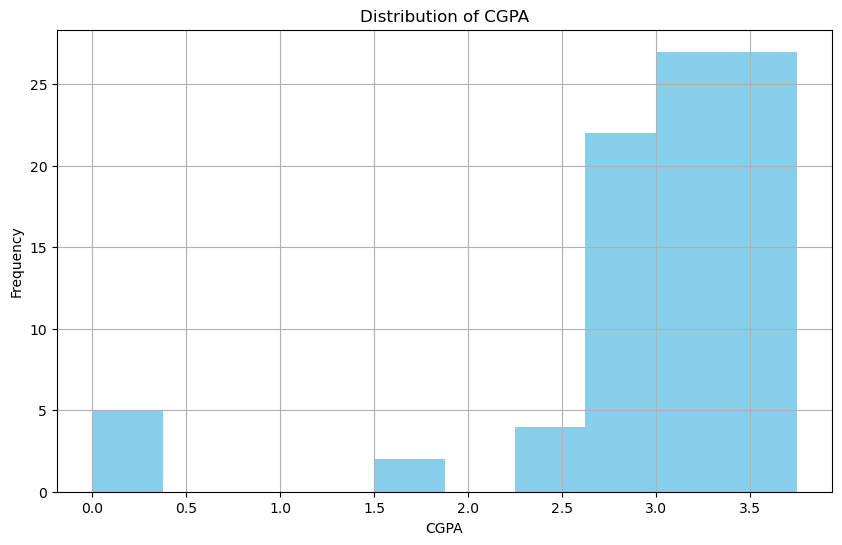

In [14]:
#Histogram: CGPA Distribution
plt.figure(figsize=(10, 6))
df['cgpa_numeric'].hist(bins=10, color='skyblue')
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()


In [15]:
df_encoded = df.copy()
for col in ['gender', 'university', 'degree_level', 'degree_major', 'residential_status', 'campus_discrimination', 'sports_engagement']:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

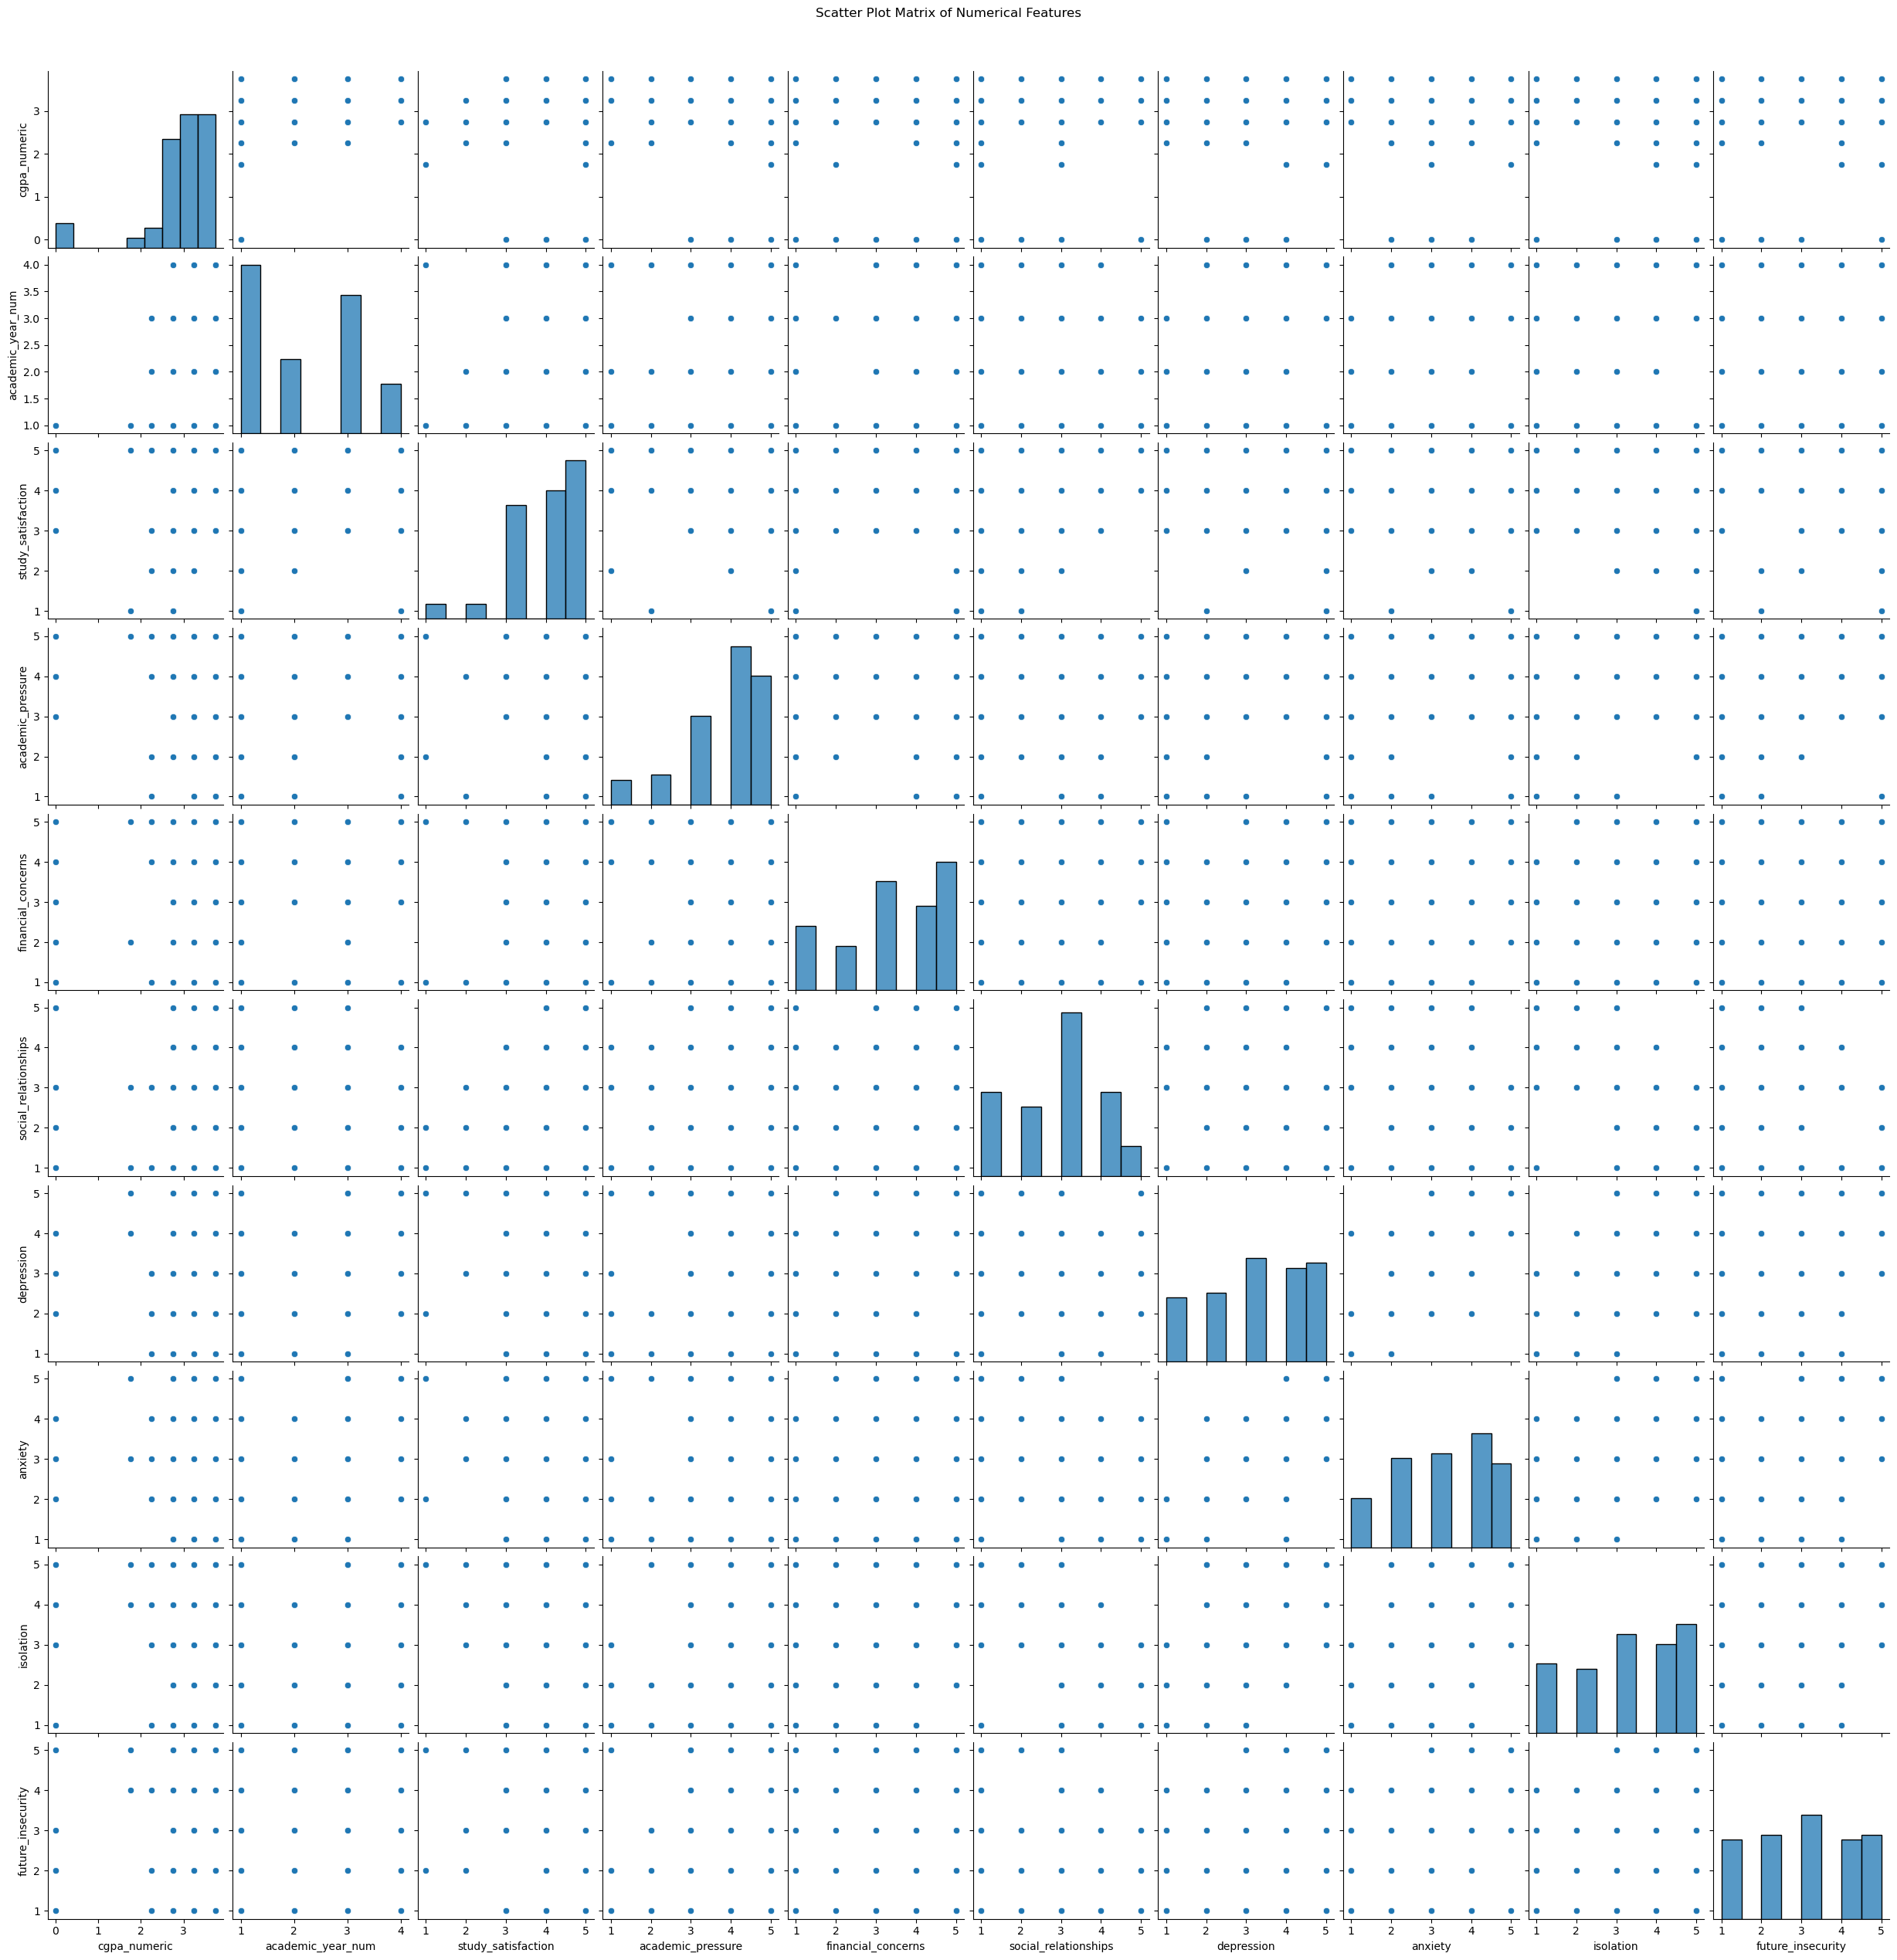

In [16]:
# Select numerical columns for the scatter plot matrix
numerical_features = ['cgpa_numeric', 'academic_year_num', 'study_satisfaction', 'academic_pressure', 'financial_concerns', 'social_relationships', 'depression', 'anxiety', 'isolation', 'future_insecurity']

# Ensure all features are in the dataframe
df_numerical = df_encoded[numerical_features]

# Create scatter plot matrix
sns.pairplot(df_numerical)
plt.suptitle('Scatter Plot Matrix of Numerical Features', y=1.02)
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
X = df[['academic_year_num', 'study_satisfaction']]
y = df['cgpa_numeric']

model = LinearRegression()
model.fit(X, y)

coefficients = model.coef_
intercept = model.intercept_
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")


Coefficients: [0.23670867 0.15166994]
Intercept: 1.9037660835892307


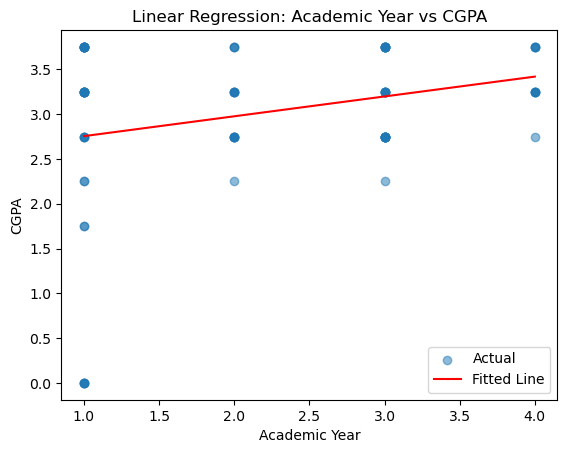

In [18]:
X = df[['academic_year_num']]  
y = df['cgpa_numeric']  
# Fit the model
model = LinearRegression()
model.fit(X, y)

# Now generate predicted CGPA values for plotting a smooth line
X_sorted = df[['academic_year_num']].sort_values(by='academic_year_num')
y_pred_sorted = model.predict(X_sorted)

# Scatter plot of actual values
plt.scatter(df['academic_year_num'], df['cgpa_numeric'], label='Actual', alpha=0.5)

# Plot the regression line
plt.plot(X_sorted, y_pred_sorted, color='red', label='Fitted Line')

plt.title('Linear Regression: Academic Year vs CGPA')
plt.xlabel('Academic Year')
plt.ylabel('CGPA')
plt.legend()
plt.show()


In [19]:
slope = model.coef_[0]
intercept = model.intercept_

# Print the regression equation
print(f"The regression equation is: CGPA = {slope:.2f} * (Academic Year) + {intercept:.2f}")


The regression equation is: CGPA = 0.22 * (Academic Year) + 2.53


In [20]:
df['cgpa_category'] = pd.cut(df['cgpa_numeric'], bins=[0, 3, 4], labels=['Low', 'High'])

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

X_classification = df[['academic_year_num', 'study_satisfaction']]
y_classification = df['cgpa_category'].cat.codes


X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.3, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy: {acc}")


Confusion Matrix:
[[ 0  0  1]
 [ 0  0 11]
 [ 0  0 15]]
Accuracy: 0.5555555555555556


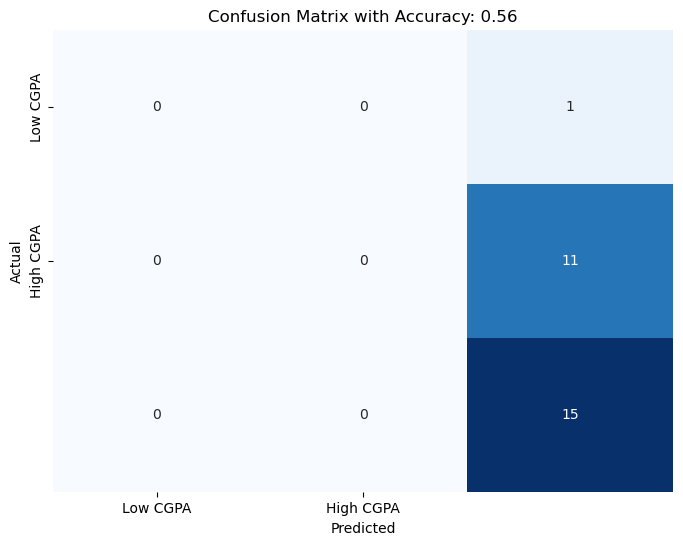

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Low CGPA', 'High CGPA'], yticklabels=['Low CGPA', 'High CGPA'])
plt.title(f'Confusion Matrix with Accuracy: {acc:.2f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['cgpa_numeric'] = label_encoder.fit_transform(df['cgpa'])

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

Text(0.5, 1.0, 'KNN Predictions')

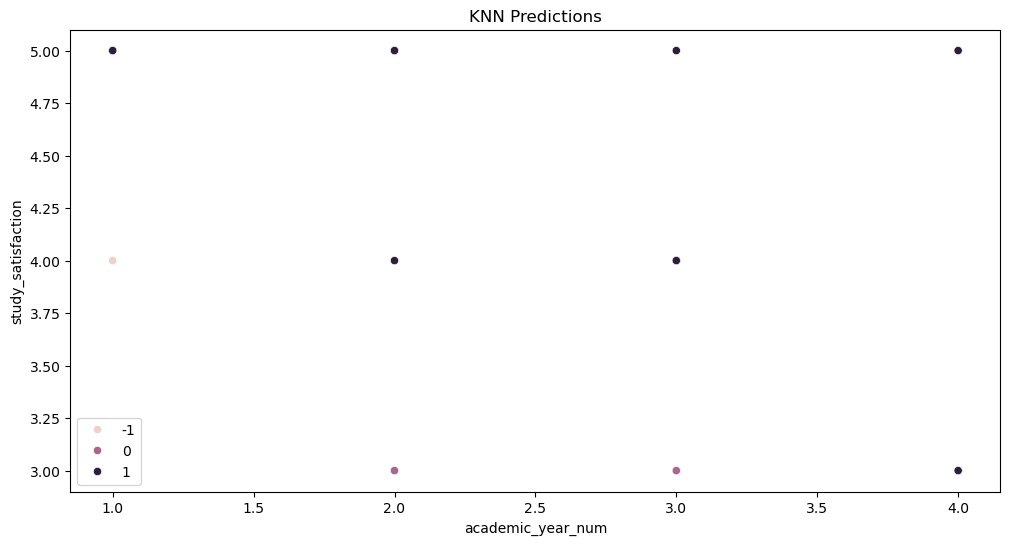

In [25]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_test['academic_year_num'], y=X_test['study_satisfaction'], hue=y_pred_knn)
plt.title('KNN Predictions')

In [26]:
print(f"KNN Model Accuracy: {accuracy_knn * 100:.2f}%")


KNN Model Accuracy: 62.96%


In [27]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)


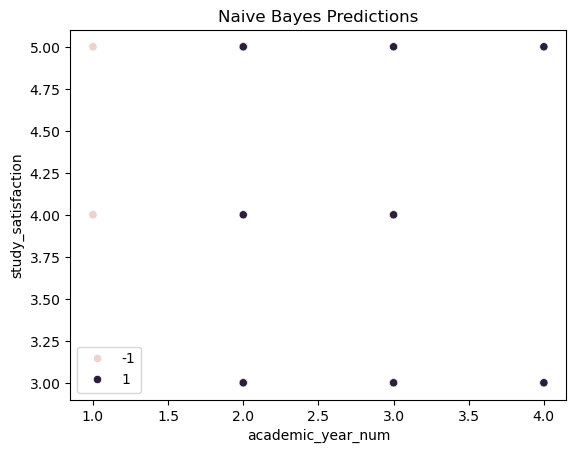

In [28]:
sns.scatterplot(x=X_test['academic_year_num'], y=X_test['study_satisfaction'], hue=y_pred_nb)
plt.title('Naive Bayes Predictions')
plt.show()

In [29]:
print(f"Naive Bayes Model Accuracy: {accuracy_nb * 100:.2f}%")

Naive Bayes Model Accuracy: 48.15%


In [30]:
from sklearn.metrics import accuracy_score
from sklearn import svm
# linear kernel
svc=svm.SVC(kernel='linear', C=1).fit(X_classification,y_classification)
svc_pred=svc.predict(X_classification)
print('svc accuracy',accuracy_score(y_classification,svc_pred)*100)
# linear svm
lin_svc=svm.LinearSVC(C=2).fit(X_classification,y_classification)
lsvc_pred=lin_svc.predict(X_classification)
print('linear svc accuracy',accuracy_score(y_classification,lsvc_pred)*100)




svc accuracy 66.66666666666666
linear svc accuracy 66.66666666666666


C:\Users\pabbi\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\pabbi\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [31]:
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=1)
rbf_svc.fit(X_classification, y_classification)

rsvc_pred = rbf_svc.predict(X_classification)

accuracy = accuracy_score(y_classification, rsvc_pred) * 100
print(f"RBF SVM Accuracy: {accuracy:.2f}%")

RBF SVM Accuracy: 73.56%


In [32]:
poly_svc=svm.SVC(kernel='poly', degree=3, C=1).fit(X_classification,y_classification)
psvc_pred=poly_svc.predict(X_classification)
print('poly accuracy',accuracy_score(y_classification,psvc_pred)*100)

poly accuracy 62.06896551724138


C:\Users\pabbi\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


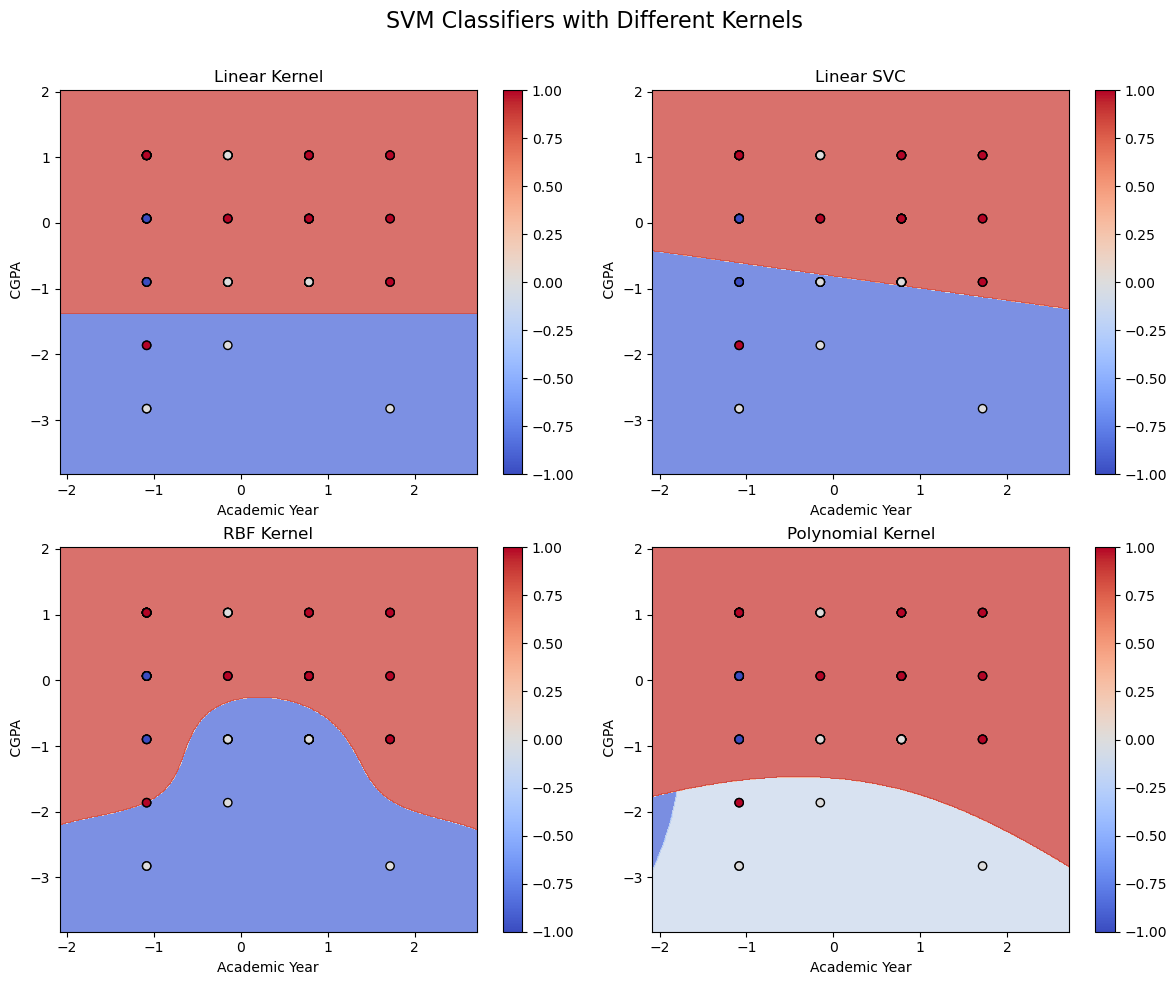

In [33]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler

# Assuming X_classification and y_classification are already defined
# Ensure that data is scaled properly
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_classification)

# Define the classifiers
models = [
    ('Linear Kernel', svm.SVC(kernel='linear', C=1)),
    ('Linear SVC', svm.LinearSVC(C=2)),
    ('RBF Kernel', svm.SVC(kernel='rbf', gamma=0.7, C=1)),
    ('Polynomial Kernel', svm.SVC(kernel='poly', degree=3, C=1))
]

# Create subplots to plot the decision boundaries
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

# Create a meshgrid for plotting
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Loop through models and plot the decision boundary
for i, (title, model) in enumerate(models):
    # Fit the model
    model.fit(X_scaled, y_classification)
    
    # Predict on the grid to get decision boundary
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and scatter plot of the data
    axes[i].contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)
    scatter = axes[i].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_classification, edgecolors='k', cmap=plt.cm.coolwarm)
    axes[i].set_title(title)
    axes[i].set_xlabel('Academic Year')
    axes[i].set_ylabel(' CGPA')
    
    # Add color bar
    fig.colorbar(scatter, ax=axes[i])

# Adjust layout and show plot
plt.tight_layout()
plt.suptitle("SVM Classifiers with Different Kernels", fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()


In [34]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=3)
rf.fit(X_train,y_train)


RandomForestClassifier(n_estimators=3)

In [35]:
y_pred = rf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.6296296296296297


In [36]:
from sklearn import tree
X_classification = df[['academic_year_num', 'study_satisfaction']]
y_classification = df['cgpa_category'].cat.codes
plt.figure(figsize=(120,70))
_=tree.plot_tree(rf.estimators_[0], filled=True)

In [37]:
!git --version


git version 2.46.2.windows.1


In [78]:
!git init


Initialized empty Git repository in C:/Users/pabbi/.git/


In [80]:
!git add .


error: open("AppData/Local/Comms/UnistoreDB/USS.jtx"): Permission denied
error: unable to index file 'AppData/Local/Comms/UnistoreDB/USS.jtx'
fatal: adding files failed


In [ ]:
git add